**Tennis Project dnkar**


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

**Extract Dataset zip files**


In [3]:
# import os
# import zipfile

# def extract_zip_files(directory):
#     # Loop through items in the given directory
#     for item in os.listdir(directory):
#         # Check if the file extension is .zip (case-insensitive)
#         if item.lower().endswith('.zip'):
#             zip_path = os.path.join(directory, item)
#             # Create an extraction directory with the same name as the .zip file (without extension)
#             extract_dir = os.path.join(directory, item[:-4])
#             os.makedirs(extract_dir, exist_ok=True)
#             try:
#                 with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#                     zip_ref.extractall(extract_dir)
#                 print(f"Extracted {item} to {extract_dir}")
#             except zipfile.BadZipFile:
#                 print(f"Skipped {item}: Not a valid zip file.")

# if __name__ == "__main__":
#     current_directory = r"D:\Data Sience\Projects\Tennis_PJ\Data\Tennis Schema\by_days_parquet_zip"
#     extract_zip_files(current_directory)


Convert parquet files to csv

In [4]:
# import glob
# import os
# import pandas as pd

# base_directory = "D:/Data Sience/Projects/Tennis_PJ/Data/Tennis Schema/by_days_parquet_zip"  

# pattern = os.path.join(base_directory, "*", "data", "raw", "raw_match_parquet", "*.parquet")
# parquet_files = glob.glob(pattern, recursive=True)


# all_data = []

# for file in parquet_files:
#     df = pd.read_parquet(file)
#     all_data.append(df)
# combined_df = pd.concat(all_data, ignore_index=False)

# output_csv = "combined_all_parquet.csv"  
# combined_df.to_csv(output_csv, index=False)

# print(f"تمامی فایل‌ها در {output_csv} ذخیره شدند.")

**Data Loading**

In [2]:
match_dataframe = pd.read_csv("Data/raw_match_parquet_combined2.csv",engine='pyarrow')
odds_dataframe = pd.read_csv("Data/raw_odds_parquet_combined.csv",engine='pyarrow')
statistics_dataframe = pd.read_csv("Data/raw_statistics_parquet_combined.csv",engine='pyarrow')
power_dataframe = pd.read_csv("Data/raw_tennis_power_parquet_combined.csv",engine='pyarrow')
votes_dataframe = pd.read_csv("Data/raw_votes_parquet_combined.csv",engine='pyarrow')
points_dataframe = pd.read_csv("Data/raw_point_by_point_parquetــcombined.csv",engine='pyarrow')

**Q1 : Total number of players in dataset**


In [6]:
unique_players = match_dataframe["name"].dropna()
unique_players = unique_players[unique_players != "Unknown"].unique()
print(f"Total number of players in dataset: {len(unique_players)}")
                                    


 

Total number of players in dataset: 2933


**Q_2 : Average of height of the players**

In [7]:
mean_height = match_dataframe["height"].dropna().to_frame(name = "height").mean()
print(f"Average height of the players: {mean_height["height"] :.2f} m")

Average height of the players: 1.82 m


**Q_3 : A player with the highest number of wins**

Collins D. with 304 wins is the top player in the dataset.


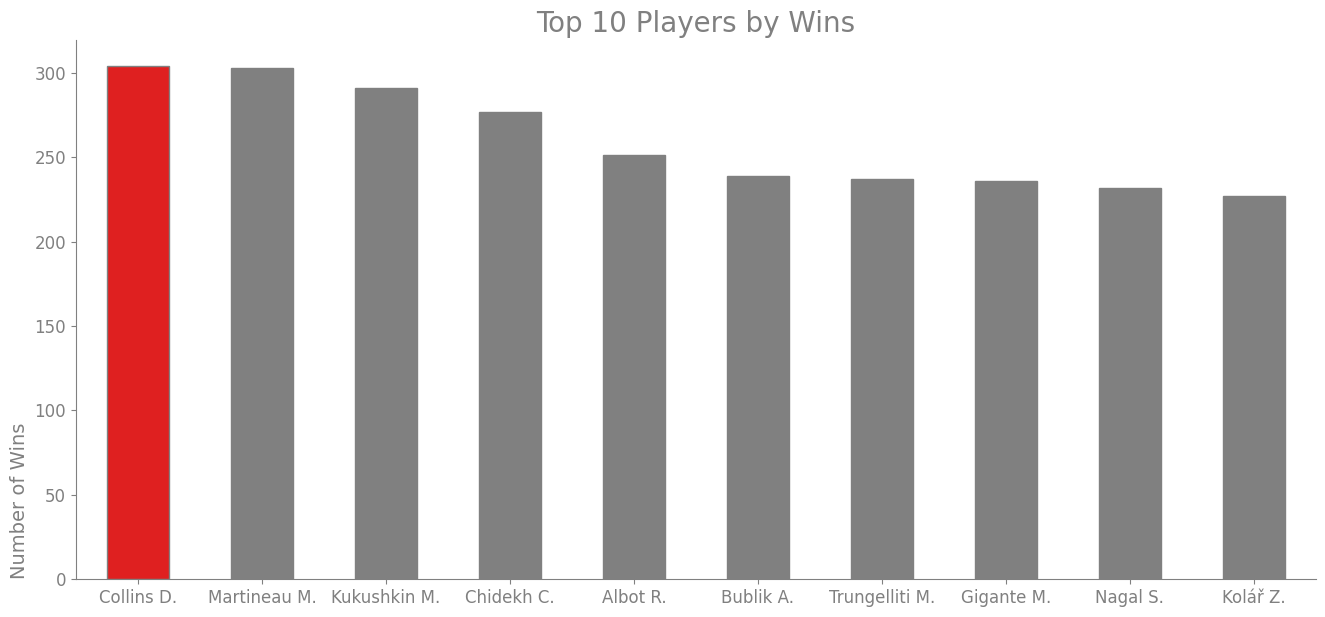

In [8]:
match_dataframe_selected = match_dataframe[["name" , "match_id" , "player_id"  ]]
odds_dataframe_selected = odds_dataframe[["match_id" , "winnig"]]

match_odds_dataframe = pd.merge(match_dataframe_selected, odds_dataframe_selected , on ="match_id" , how = "left")
match_odds_dataframe.dropna().copy()

winners = match_odds_dataframe.query(
    "winnig == True").groupby("player_id").agg(
        {"match_id" : "count", 
         "name" : "first"}).reset_index().sort_values(by="match_id", ascending=False)

winners = winners.assign(
    name_colors = lambda x : np.where(x["name"].eq("Collins D."), "red", "gray"))

fig, ax = plt.subplots(figsize = (16,7))
sns.barplot(
    data = winners.head(10), 
    x = "name" ,
    y = "match_id",
    width = 0.5,
    palette = list(winners["name_colors"].head(10)),
    hue = "name",
    edgecolor = "gray",
    ax = ax
)

ax.spines[["left", "bottom"]].set_color("gray")
ax.spines[["right", "top"]].set_visible(False)
                                                                                
ax.tick_params(axis = "x" ,
              colors = "gray", 
              labelsize = "large")

ax.tick_params(axis = "y" ,
              colors = "gray", 
              labelsize = "large")

ax.set_title("Top 10 Players by Wins", 
              fontsize = 20,
              color = "gray")

plt.xlabel("")
plt.ylabel("Number of Wins" ,
              color = "gray",
              loc = "bottom",
              fontsize = 14)

print("Collins D. with 304 wins is the top player in the dataset.")
plt.show()



**Q_4 : The longest match recorded in terms of duration**


**Q_5 : Number of Sets That are Typically Played in a Tennis match**

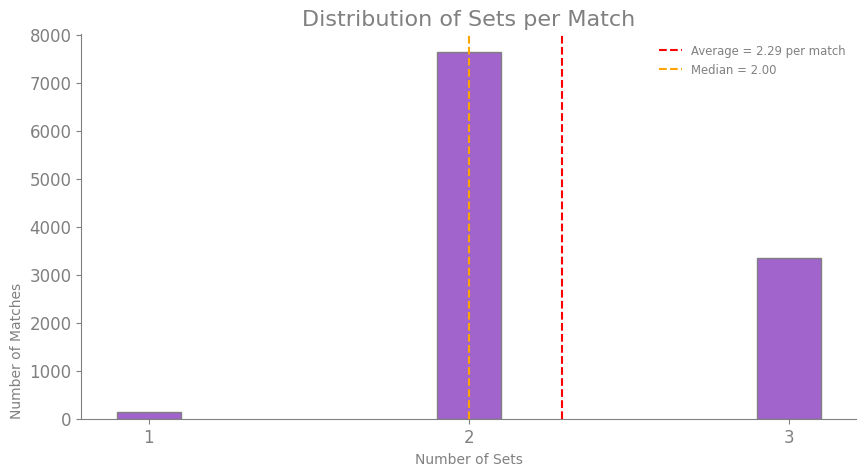

In [9]:
sets_per_match = power_dataframe.groupby("match_id")["set_num"].nunique()
sets_average = sets_per_match.mean()

# ساخت جدول توزیع
sets_distribution = sets_per_match.sort_index().reset_index()
sets_distribution.columns = [ "match id", "set number"]
sets_average_df = sets_distribution["set number"].astype(float).agg({"Average": "mean","Median": "median"}).reset_index()
sets_average_df.columns = ["index", "Stats"]


sets_distribution_df = sets_per_match.value_counts().sort_index().reset_index()
sets_distribution_df.columns = ["set number", "match count"]
sets_distribution_df["set number"] = sets_distribution_df["set number"].astype(float)

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(sets_distribution_df["set number"], sets_distribution_df["match count"],
        color="#A163CC", width=0.2, edgecolor= "gray")

ax.spines[["left", "bottom"]].set_color("gray")
ax.spines[["right", "top"]].set_visible(False)
# خط میانگین
ax.axvline(x=sets_average, color='red',
        linestyle='--', 
        label=f'Average = {sets_average:.2f} per match')
# خط میانه
ax.axvline(x=sets_average_df.loc[1, "Stats"],
        color='orange',
        linestyle='--', 
        label=f'Median = {sets_average_df.loc[1, "Stats"]:.2f} ')

ax.tick_params(axis = "x" ,
              colors = "gray", 
              labelsize = "large")

ax.tick_params(axis = "y" ,
              colors = "gray", 
              labelsize = "large")

plt.title("Distribution of Sets per Match" , fontsize=16 , color = "gray")
plt.xlabel("Number of Sets" , color = "gray")
plt.ylabel("Number of Matches" , color = "gray" , loc = "bottom")
plt.xticks(sets_distribution_df["set number"])

legend = plt.legend(frameon = False , fontsize = "small")
for text in legend.get_texts():
    text.set_color("gray")
plt.show()



**Q_6 : The Country That Has Produced the Most Successful Tennis Players**

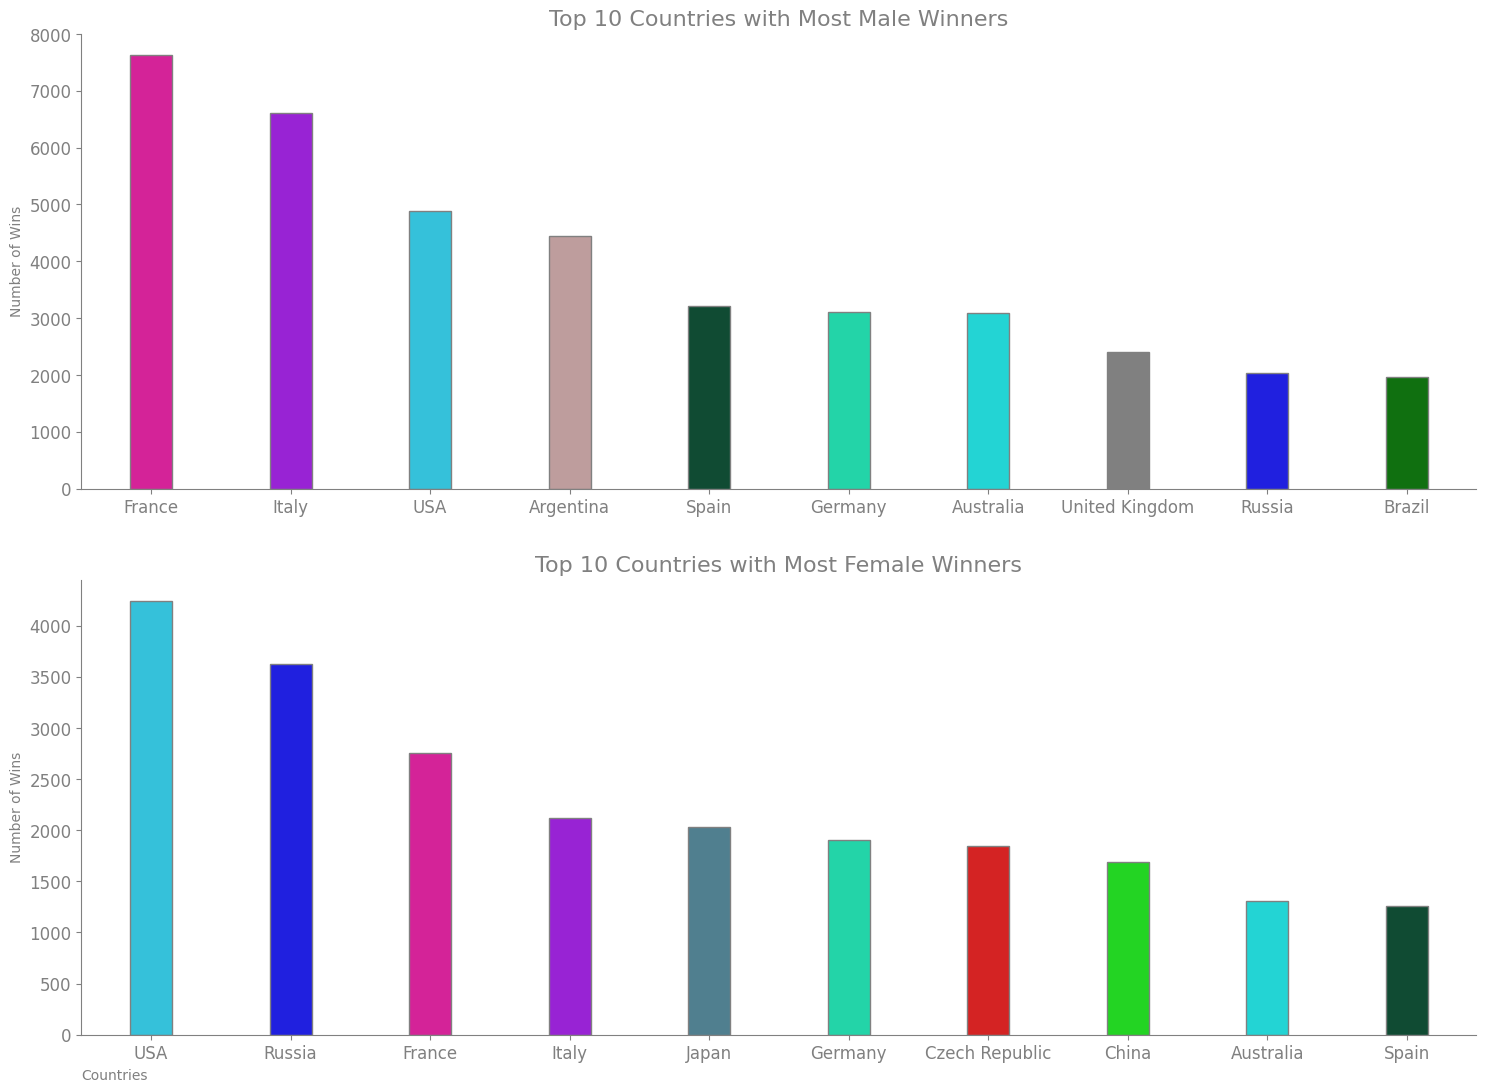

In [35]:
#By using codes in Q_3
match_dataframe_selected = match_dataframe[["name" , "match_id" , "player_id" , "country" , "gender" ]]
odds_dataframe_selected = odds_dataframe[["match_id" , "winnig"]]

match_odds_dataframe = pd.merge(match_dataframe_selected, odds_dataframe_selected , on ="match_id" , how = "left")
match_odds_dataframe = match_odds_dataframe.dropna()
male_winners = (
    match_odds_dataframe
    .query("winnig == True & gender == 'M'")
    .groupby("country")
    .agg({"player_id": "count"})
    .reset_index()
    .sort_values(by="player_id", ascending=False)
    .head(10)
)
female_winners = (
    match_odds_dataframe
    .query("winnig == True & gender == 'F'")
    .groupby("country")
    .agg({"player_id": "count"})
    .reset_index()
    .sort_values(by="player_id", ascending=False)
    .head(10)
)



male_winners.columns = ["Country", "Number of wins"]

female_winners.columns = ["Country", "Number of wins"]





male_winners = male_winners.assign(
    country_color = lambda x : 
        np.where(x["Country"].eq("France"), "#F205A1",
        np.where(x["Country"].eq("Italy"), "#A105F2",
        np.where(x["Country"].eq("USA") , "#1AD4F5",
        np.where(x["Country"].eq("Argentina"), "#c39797",
        np.where(x["Country"].eq("Spain"), "#065535",
        np.where(x["Country"].eq("Germany"), "#05F2B7",
        np.where(x["Country"].eq("Australia"), "#05F2F2",
        np.where(x["Country"].eq("Russia"), "#0000ff",
        np.where(x["Country"].eq("Brazil"), "#008000",
        np.where(x["Country"].eq("Japan"), "#468499",
        "#808080")))))))))))
    
female_winners = female_winners.assign(
    country_color = lambda x : 
        np.where(x["Country"].eq("USA") , "#1AD4F5",
        np.where(x["Country"].eq("Russia"), "#0000ff",
        np.where(x["Country"].eq("France"), "#F205A1",
        np.where(x["Country"].eq("Italy"), "#A105F2",
        np.where(x["Country"].eq("Japan"), "#468499",
        np.where(x["Country"].eq("Germany"), "#05F2B7",
        np.where(x["Country"].eq("Spain"), "#065535",
        np.where(x["Country"].eq("Switzerland"), "#F25C05",
        np.where(x["Country"].eq("Germany"), "#05F2B7",
        np.where(x["Country"].eq("Czech Republic"), "#F20505",
        np.where(x["Country"].eq("China"), "#05F205",
        np.where(x["Country"].eq("Australia"), "#05F2F2",
        np.where(x["Country"].eq("Spain"), "#065535",
        "#808080"))))))))))))))


fig,ax = plt.subplots(2 , 1 ,figsize=(18,13) )

sns.barplot(
    data = male_winners ,
    x = "Country",
    y = "Number of wins" , 
    ax = ax[0],
    palette = list(male_winners["country_color"].values),
    hue = "country_color",
    edgecolor = "gray",
    width = 0.3
    
)
ax[0].spines[["left", "bottom"]].set_color("gray")
ax[0].spines[["right", "top"]].set_visible(False)

ax[0].set_title("Top 10 Countries with Most Male Winners",
             fontsize=16, 
             color="gray")

ax[0].tick_params( axis ="x" , 
             colors = "gray",
             labelsize = "large")

ax[0].tick_params( axis ="y" , 
             colors = "gray",
             labelsize = "large")

ax[0].set_xlabel("")
ax[0].set_ylabel("Number of Wins", color="gray", loc="center")


ax[0].get_legend().remove()


sns.barplot(
    data = female_winners ,
    x = "Country",
    y = "Number of wins",
    ax = ax[1],
    palette = list(female_winners["country_color"].values),
    hue = "country_color",
    edgecolor = "gray",
    width = 0.3
)

ax[1].spines[["left", "bottom"]].set_color("gray")
ax[1].spines[["right", "top"]].set_visible(False)

ax[1].set_title("Top 10 Countries with Most Female Winners", fontsize=16, color="gray")

ax[1].tick_params( axis ="x" , 
             colors = "gray",
             labelsize = "large")

ax[1].tick_params( axis ="y" , 
             colors = "gray",
             labelsize = "large")

ax[1].set_xlabel("Countries", color="gray",loc= "left")
ax[1].set_ylabel("Number of Wins", color="gray", loc="center")

ax[1].get_legend().remove()


**Q_7 : The Average Number of Aces per Match**

Average number of aces per match: 8.19


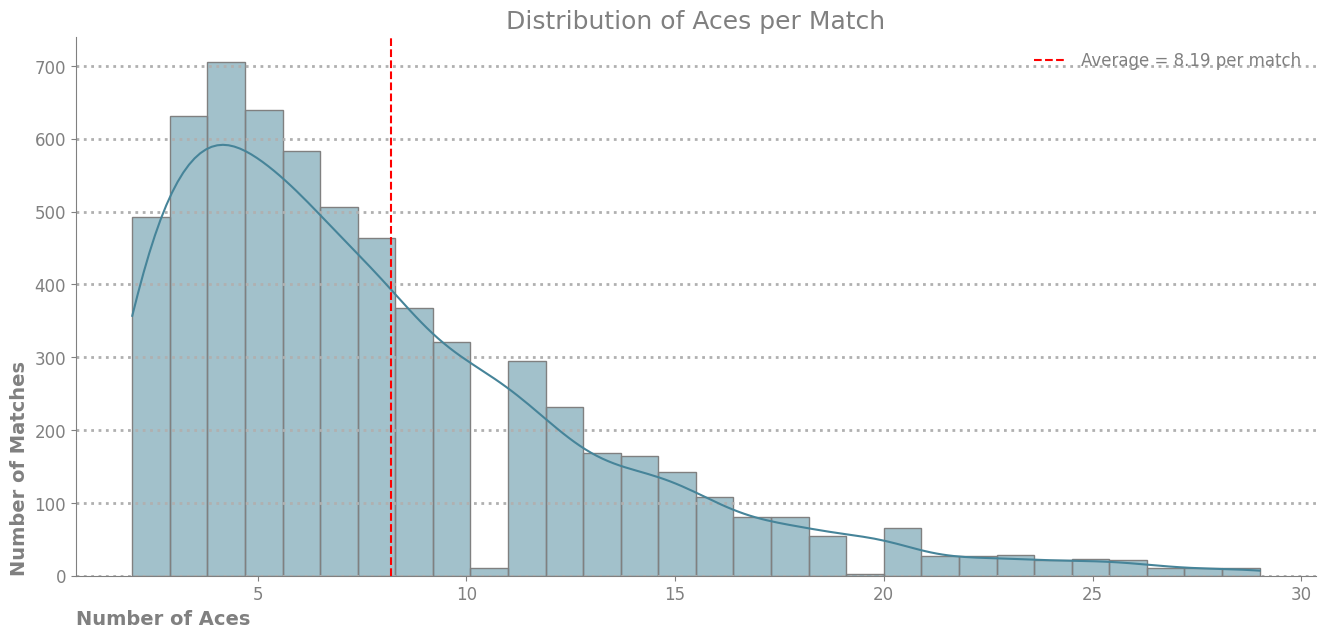

In [11]:
aces = statistics_dataframe.query("period == 'ALL' & statistic_name == 'aces' & home_value > 0 & away_value > 0").copy()
aces["total_aces"] = aces["home_value"] + aces["away_value"]
total_aces_count = aces["total_aces"]

total_aces_average = aces["total_aces"].mean()


print(f"Average number of aces per match: {total_aces_average:.2f}")
total_aces_count = aces.groupby("match_id")["total_aces"].mean().reset_index()
total_aces_count.columns = ["match_id", "total_aces"]

fig , ax = plt.subplots( figsize = (16,7))

sns.histplot(
    data = total_aces_count.query("total_aces < 30"),
    x = "total_aces" , 
    bins = 30,
    color = "#468499",
    edgecolor = "gray",
    ax = ax , 
    kde = True ,
   
    )

ax.spines[["right", "top"]].set_visible(False)

ax.spines[["left", "bottom"]].set_color("gray")

ax.tick_params(axis = "x" ,
              colors = "gray", 
              labelsize = "large")

ax.tick_params(axis = "y" ,
              colors = "gray", 
              labelsize = "large")

ax.set_title("Distribution of Aces per Match" , 
    fontsize = 18 ,
    color = "gray" ,
    )

ax.set_xlabel("Number of Aces" , color = "gray",
                            weight = "bold",
                            fontsize = 14,
                            loc = "left")

ax.set_ylabel("Number of Matches" , color = "gray",
                            weight = "bold",
                            fontsize = 14,
                            loc = "bottom")

ax.axvline(x=total_aces_average, color='red',
        linestyle='--', 
        label=f'Average = {total_aces_average:.2f} per match')

ax.legend()


legend = plt.legend(frameon = False , fontsize = "large")
for text in legend.get_texts():
    text.set_color("gray")

ax.grid(axis = "x" , linestyle= "" )
ax.grid(axis = "y" , linestyle= "dotted" , linewidth = 2)


plt.show()

**Q_8 : The Difference in the Number of Double Faults Based on Gender**


The number of double faults in females is %2.13 more than males


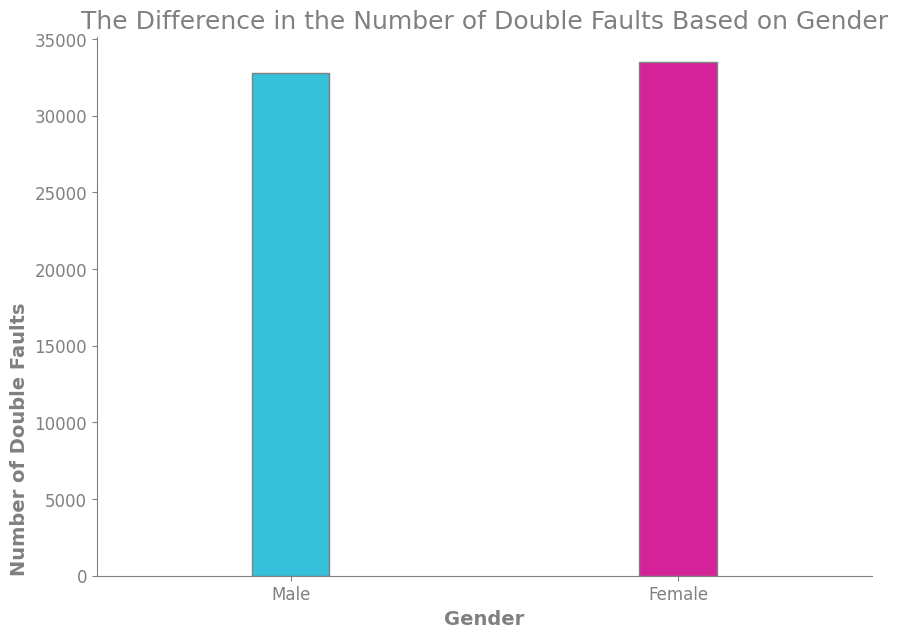

In [159]:
match_dataframe_selected = match_dataframe.loc[: , ["match_id" , "gender"  ] ]
statistics_dataframe_selected = statistics_dataframe.loc[: , ["match_id" , "statistic_name" , "home_value" , "away_value" , "period"]]

stats_merged = match_dataframe_selected.merge(statistics_dataframe_selected, on="match_id")
                                    


males_faults = (stats_merged
    .query("statistic_name == 'double_faults' & gender == 'M' & period == 'ALL'")
    .groupby("match_id")
    .agg({"home_value": "mean", "away_value": "mean"})
    .reset_index()
    .sort_values("match_id")
    .dropna()
)

females_faults = (stats_merged
    .query("statistic_name == 'double_faults' & gender == 'F' & period == 'ALL'")
    .groupby("match_id")
    .agg({"home_value": "mean", "away_value": "mean"})
    .reset_index()
    .sort_values("match_id")
    .dropna()
)

total_males_faults = males_faults["home_value"].sum() + males_faults["away_value"].sum()
total_females_faults = females_faults["home_value"].sum() + females_faults["away_value"].sum()

difference_by_gender = (total_females_faults - total_males_faults) / ((total_females_faults+total_males_faults)/2) * 100

print(f'The number of double faults in females is %{difference_by_gender :.2f} more than males')

faults_dataframe = pd.DataFrame({
    "gender" : ["Male" , "Female"] ,
    "total_faults" : [total_males_faults , total_females_faults]
})


fig,ax = plt.subplots(figsize = (10,7))

sns.barplot(
    data = faults_dataframe,
    x = "gender" ,
    y = "total_faults",
    palette = ["#1AD4F5", "#F205A1"],
    edgecolor = "gray",
    width = 0.2,
    hue = "gender",
    ax = ax
)

ax.spines[["right", "top"]].set_visible(False)

ax.spines[["left", "bottom"]].set_color("gray")

ax.tick_params(axis = "x" ,
              colors = "gray", 
              labelsize = "large")

ax.tick_params(axis = "y" ,
              colors = "gray", 
              labelsize = "large")

ax.set_title("The Difference in the Number of Double Faults Based on Gender" , 
    fontsize = 18 ,
    color = "gray" ,
    )

ax.set_xlabel("Gender" , color = "gray",
                            weight = "bold",
                            fontsize = 14
                            )

ax.set_ylabel("Number of Double Faults" , color = "gray",
                            weight = "bold",
                            fontsize = 14,
                            loc = "bottom")

plt.show()

**Q_9 : The player which won the most tournaments in a single month**

In [ ]:
match_dataframe["tourney_month"] = pd.to_datetime(match_dataframe["start_datetime" ]).dt.to_period('M')

mounthly_winners = (match_dataframe
    .groupby("tourney_month" , "winner_name")
    .size()
    .reset_index()
    )

best_winner = mounthly_winners.idxmax()
print(f'The best mountly winner is {best_winner}')

**Q_10 : The Correlation Between a Player's Height and Their Ranking**

The correlation between height and rank is 0.08


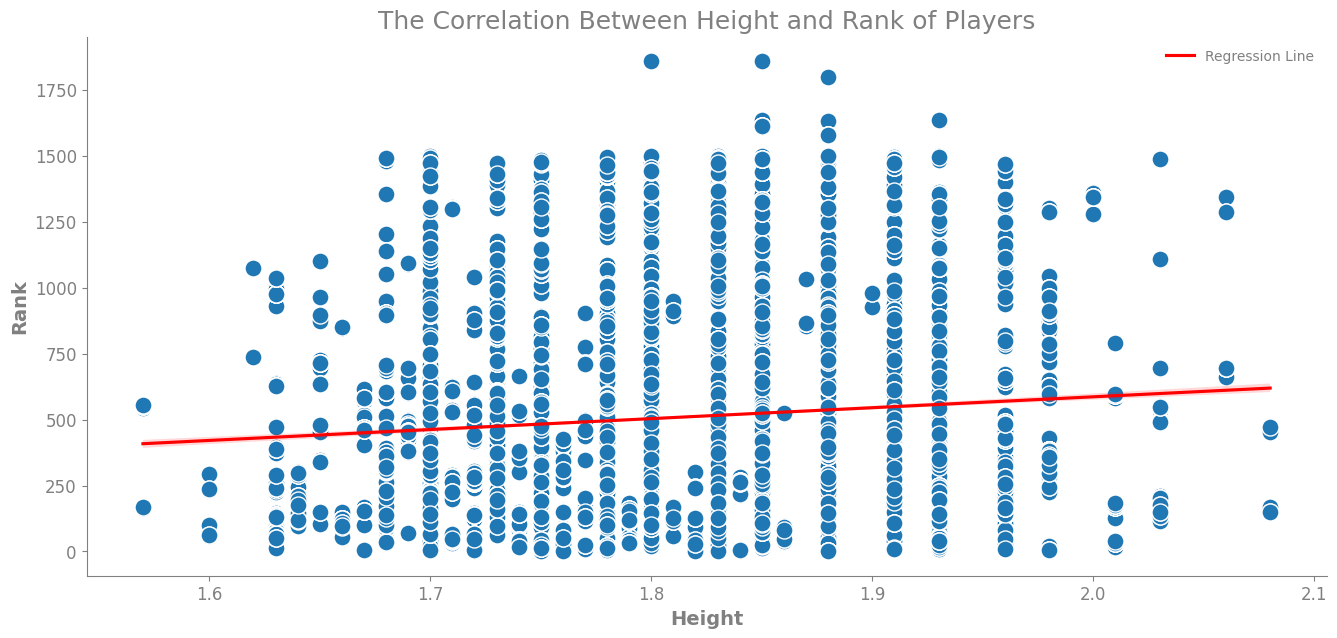

In [74]:
match_dataframe_selected = match_dataframe.loc[: ,["name" , "height" , "current_rank", "player_id"]]

match_dataframe_selected = match_dataframe_selected.dropna(subset=["height", "current_rank"])

heigh_rank_correlation = match_dataframe_selected["height"].corr(match_dataframe_selected["current_rank"])
print(f'The correlation between height and rank is {heigh_rank_correlation:.2f}')

fig ,ax = plt.subplots(figsize = (16,7))


sns.scatterplot(
    data = match_dataframe_selected ,
    x = "height" ,
    y = "current_rank",
    
    s = 150,
    ax = ax
)

sns.regplot(
    data = match_dataframe_selected ,
     x = "height" ,
     y = "current_rank",
     color = "red",
     scatter = False,
     label = "Regression Line"
     
)

ax.spines[["right", "top"]].set_visible(False)

ax.spines[["left", "bottom"]].set_color("gray")

ax.tick_params(axis = "x" ,
              colors = "gray", 
              labelsize = "large")

ax.tick_params(axis = "y" ,
              colors = "gray", 
              labelsize = "large")

ax.set_title("The Correlation Between Height and Rank of Players" , 
    fontsize = 18 ,
    color = "gray" ,
    )

ax.set_xlabel("Height" , color = "gray",
                            weight = "bold",
                            fontsize = 14
                            )

ax.set_ylabel("Rank" , color = "gray",
                            weight = "bold",
                            fontsize = 14)

legend = plt.legend(
    frameon = False)
for text in legend.get_texts():
    text.set_color("gray")


plt.show()

**Q_11 : The Average Duration of Matches**

**Q_12 : The Average Number of Games per Set in Men's Matches Compared to Women's Matches**

The difference in the average number of games per set between Males and females is %4.12


C:\Users\alire\AppData\Local\Temp\ipykernel_7556\195723015.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Female" , "Male"] ,


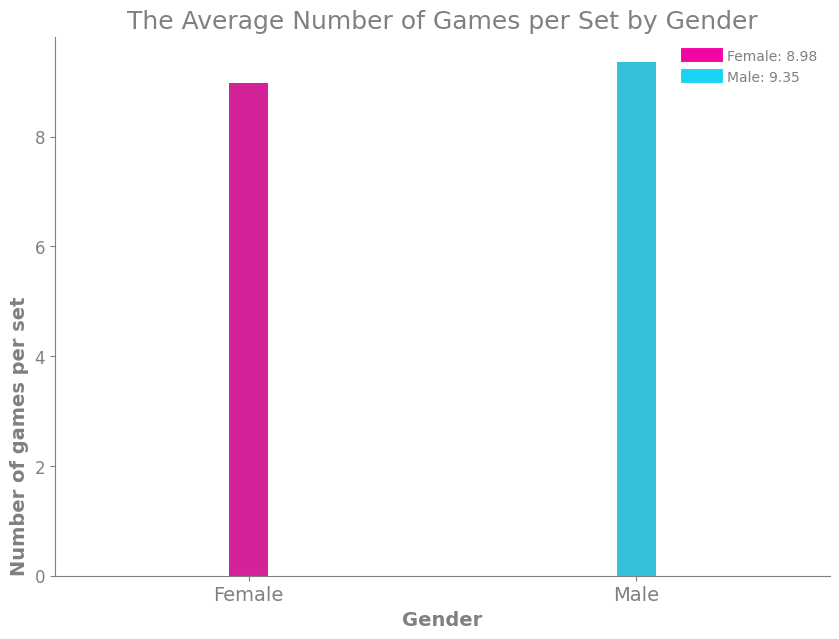

In [148]:
points_dataframe_selected = points_dataframe.loc[: , ["match_id" , "game_id" , "set_id"]]
gender_selected = match_dataframe.loc[: , ["gender" , "match_id"]].dropna()
points_dataframe_selected = points_dataframe_selected.drop_duplicates(subset=["match_id", "game_id", "set_id"])   

games_per_set = (points_dataframe_selected
    .groupby(["match_id", "set_id"])
    .agg(total_games = ("game_id" ,"count"))
).reset_index().sort_values(by=["total_games"] , ascending=False)

games_per_set_g = pd.merge(games_per_set , gender_selected, on = "match_id" , how = "left")

games_per_set_avg = games_per_set_g.groupby("gender")["total_games"].mean().reset_index()
difference = (games_per_set_avg["total_games"].max() - games_per_set_avg["total_games"].min()) / ((games_per_set_avg["total_games"].max() + games_per_set_avg["total_games"].min()) / 2) * 100
print(f'The difference in the average number of games per set between Males and females is %{difference:.2f}')

fig , ax = plt.subplots(figsize=(10,7))
sns.barplot(
    data = games_per_set_avg,
    x = "gender",
    y = "total_games",
    width = 0.1,
    palette = ["#F205A1", "#1AD4F5"],
    hue = "gender",
    ax=ax
)

ax.spines[["right", "top"]].set_visible(False)

ax.spines[["left", "bottom"]].set_color("gray")

ax.tick_params(axis = "x" ,
              colors = "gray", 
              labelsize = "large")

ax.tick_params(axis = "y" ,
              colors = "gray", 
              labelsize = "large")

ax.set_title("The Average Number of Games per Set by Gender" , 
    fontsize = 18 ,
    color = "gray" ,
    )

ax.set_xlabel("Gender" , color = "gray",
                            weight = "bold",
                            fontsize = 14
                            )

ax.set_ylabel("Number of games per set" , color = "gray",
                            weight = "bold",
                            fontsize = 14,
                            loc = "bottom")

ax.set_xticklabels(["Female" , "Male"] , 
                        fontsize = 14)

custom_legend = [
    plt.Line2D([0], [0], color="#F205A1", lw=10, label="Female: 8.98"),
    plt.Line2D([0], [0], color="#1AD4F5", lw=10, label="Male: 9.35 ")
]

legend = ax.legend(handles=custom_legend , frameon = False)
for text in legend.get_texts():
    text.set_color("gray")

plt.show()

**Q_13 : The Distribution of Left-Handed Versus Right-Handed Players**

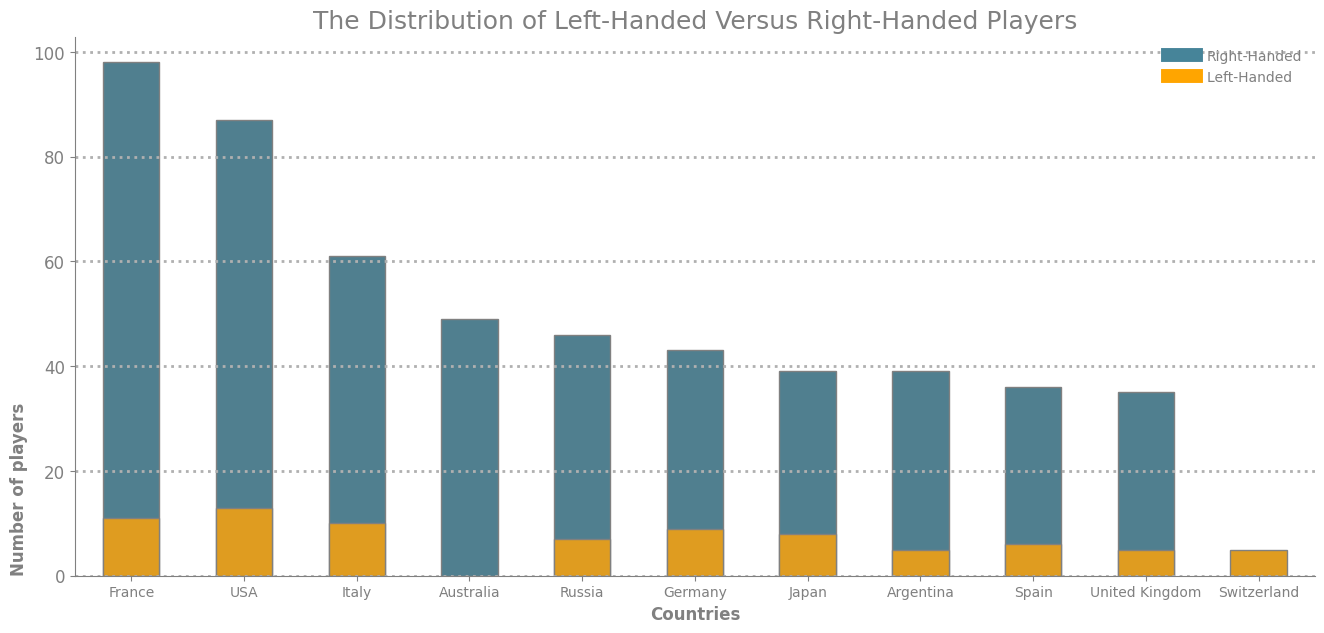

In [ ]:
hand_country = match_dataframe.loc[: , ["country" , "plays" , "player_id"]]
hand_country = hand_country.dropna()
hand_country_modified = ( hand_country
    .query("plays == 'right-handed' | plays == 'left-handed'")
    .groupby(["country" , "plays"])
    .agg(total_players = ("player_id" , "nunique"))
).reset_index().sort_values(by = "total_players" , ascending = False)

right_handed_players = hand_country_modified.query("plays == 'right-handed'").head(10)
left_handed_players = hand_country_modified.query("plays == 'left-handed'").head(10)


fig,ax = plt.subplots(figsize = (16,7))

sns.barplot(
    data = right_handed_players , 
    x = "country" , 
    y = "total_players",
    edgecolor = "gray",
    width = 0.5,
    color = "#468499",
    ax =ax 
)

sns.barplot(
    data = left_handed_players , 
    x = "country" , 
    y = "total_players",
    edgecolor = "gray",
    width = 0.5,
    color = "orange",
    ax =ax 
)

ax.spines[["right", "top"]].set_visible(False)

ax.spines[["left", "bottom"]].set_color("gray")

ax.tick_params(axis = "x" ,
              colors = "gray", 
              labelsize = "medium")

ax.tick_params(axis = "y" ,
              colors = "gray", 
              labelsize = "large")

ax.set_title("The Distribution of Left-Handed Versus Right-Handed Players" , 
    fontsize = 18 ,
    color = "gray" ,
    )

ax.set_xlabel("Countries" , color = "gray",
                            weight = "bold",
                            fontsize = 12
                            )

ax.set_ylabel("Number of players" , color = "gray",
                            weight = "bold",
                            fontsize = 12,
                            loc = "bottom")
ax.grid(axis = "y", linestyle= "dotted" , linewidth = 2)

custom_legend = [
    plt.Line2D([0], [0], color="#468499", lw=10, label="Right-Handed"),
    plt.Line2D([0], [0], color="orange", lw=10, label="Left-Handed ")
]

legend = ax.legend(handles=custom_legend , frameon = False)
for text in legend.get_texts():
    text.set_color("gray")

plt.show()

**Q_14 : The Most Common Type of Surface Used in Tournaments**

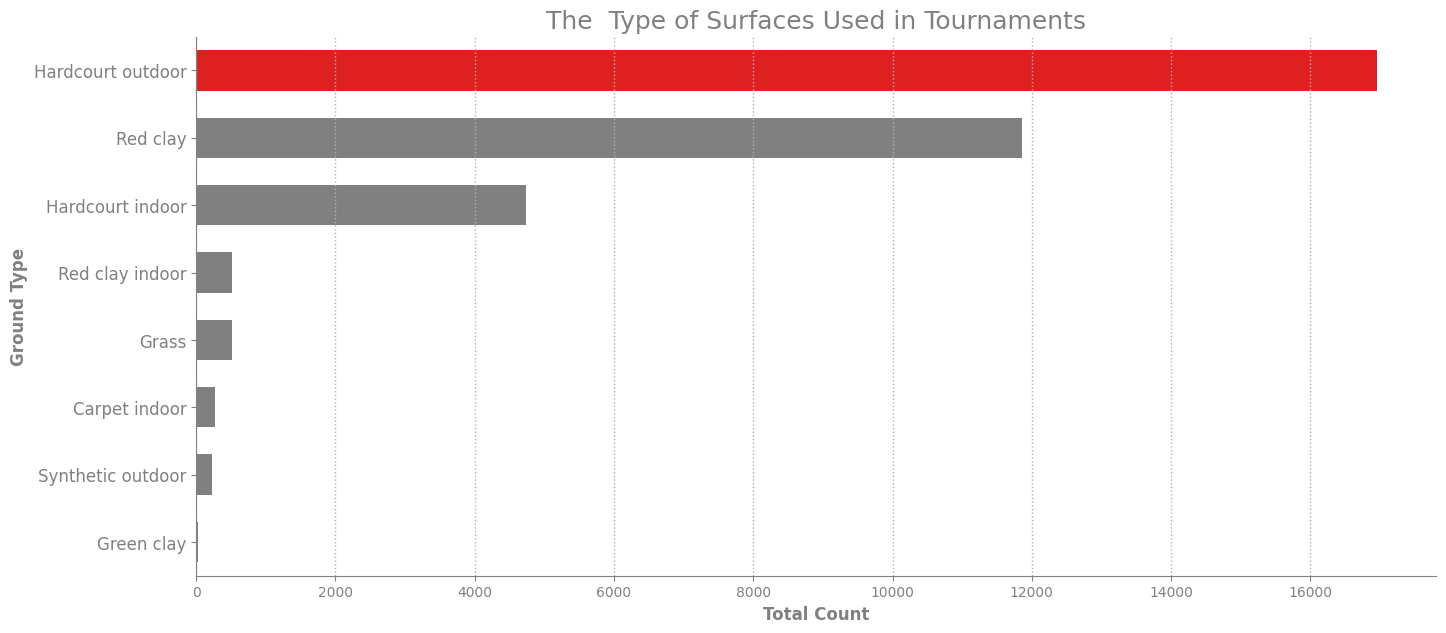

In [210]:
match_dataframe_selected = match_dataframe.loc[: , ["match_id" , "ground_type"]].dropna()
surface = (match_dataframe_selected
    .groupby("ground_type")
    .agg(total_count=("match_id" , "count"))
    .reset_index()
    .sort_values("total_count" , ascending = False)
    
    )

surface = surface.assign(
    surface_color = lambda x : np.where(x["ground_type"].eq("Hardcourt outdoor") , "red" , "gray" )
)

fig , ax = plt.subplots(figsize= (16,7))
sns.barplot(
    data = surface ,
    y = "ground_type" ,
    x = "total_count" ,
    palette = list(surface["surface_color"].values),
    width = 0.6,
    hue = "ground_type",
    ax = ax
)

ax.spines[["right", "top"]].set_visible(False)

ax.spines[["left", "bottom"]].set_color("gray")

ax.tick_params(axis = "x" ,
              colors = "gray", 
              labelsize = "medium")

ax.tick_params(axis = "y" ,
              colors = "gray", 
              labelsize = "large")

ax.set_title("The  Type of Surfaces Used in Tournaments" , 
    fontsize = 18 ,
    color = "gray" ,
    )

ax.set_xlabel("Total Count" , color = "gray",
                            weight = "bold",
                            fontsize = 12
                            )

ax.set_ylabel("Ground Type" , color = "gray",
                            weight = "bold",
                            fontsize = 12,
                            loc = "center")
ax.grid(axis = "x", linestyle= "dotted" , linewidth = 1)

plt.show()

**Q_15 : Number of Distinct Countries are Represented in the Dataset**

In [160]:
country_count = match_dataframe["country"].nunique()
country_count
print(f'The Number of Distinct Countries is {country_count}')
distinct_country_list = match_dataframe["country"].dropna().unique()
distinct_country_dataframe = pd.DataFrame(distinct_country_list , columns=["Countries"]).head(10)
distinct_country_dataframe

The Number of Distinct Countries is 108


,Countries
0,Canada
1,Italy
2,Spain
3,France
4,Kazakhstan
5,Japan
6,Australia
7,USA
8,Germany
9,United Kingdom


**Q_16 : The player Which Has The Highest Winning Percentage Against Top 10 Ranked Opponentst**

In [8]:
# Couldn`t find any columns in dataset which specifies winners and losers

**Q_17 : The Average Number of Breaks of Serve per Match**

The Average Number of Breaks of Serve per Match is 13.27


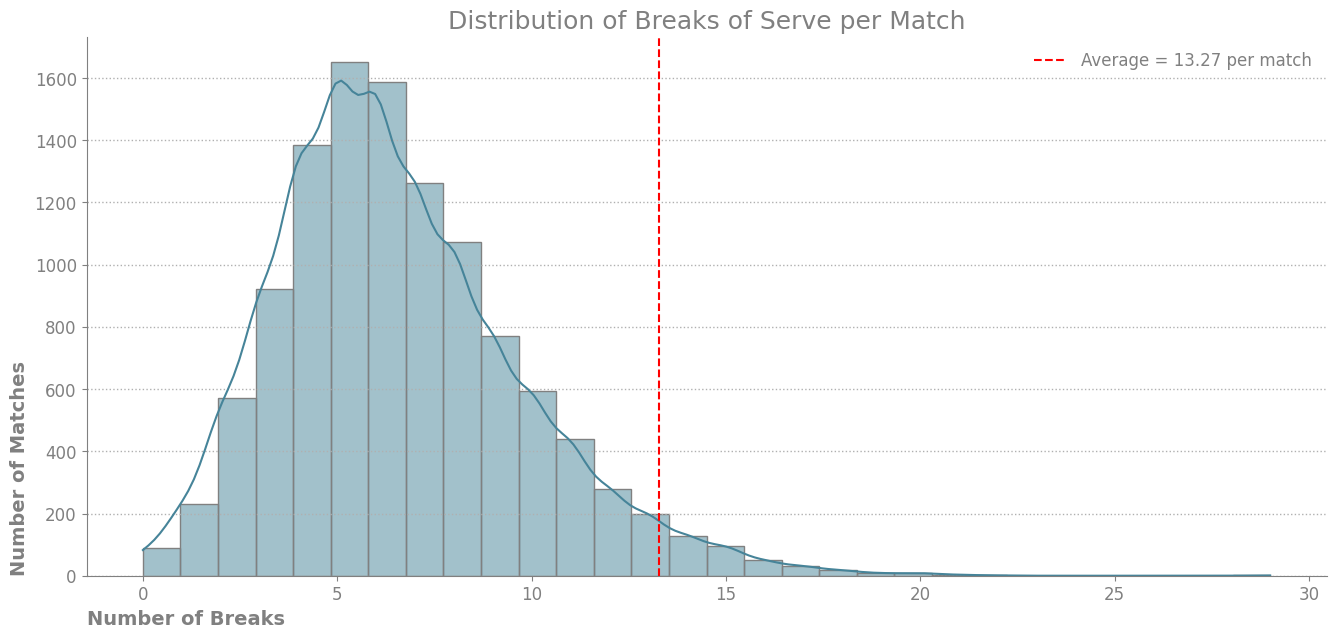

In [34]:
breaks = statistics_dataframe.loc[: , ["match_id" , "period" , "statistic_name" , "home_value" , "away_value"]].dropna().copy()

breaks["total_breaks"] = breaks["home_value"] + breaks["away_value"]

breaks_per_match_avg = (breaks
    .query("period == 'ALL' & statistic_name == 'break_points_converted'")
    .groupby("match_id")
    ["total_breaks"].sum().mean()
)
print(f'The Average Number of Breaks of Serve per Match is {breaks_per_match_avg :.2f}')

breaks_per_match_count = (breaks
    .query("period == 'ALL' & statistic_name == 'break_points_converted'")
    .groupby("match_id")
    ["total_breaks"].mean()
    .reset_index()
)

breaks_per_match_count.columns = ["match_id" , "total_breaks_count"]
breaks_per_match_count

fig,ax = plt.subplots(figsize=(16,7))

sns.histplot(
    data = breaks_per_match_count ,
    x = "total_breaks_count",
    bins = 30 ,
    kde = True, 
    color = "#468499",
    edgecolor = "gray",
    ax =ax
)
ax.spines[["right", "top"]].set_visible(False)

ax.spines[["left", "bottom"]].set_color("gray")

ax.tick_params(axis = "x" ,
              colors = "gray", 
              labelsize = "large")

ax.tick_params(axis = "y" ,
              colors = "gray", 
              labelsize = "large")

ax.set_title("Distribution of Breaks of Serve per Match" , 
    fontsize = 18 ,
    color = "gray" ,
    )

ax.set_xlabel("Number of Breaks" , color = "gray",
                            weight = "bold",
                            fontsize = 14,
                            loc = "left")

ax.set_ylabel("Number of Matches" , color = "gray",
                            weight = "bold",
                            fontsize = 14,
                            loc = "bottom")

ax.axvline(x=breaks_per_match_avg, color='red',
        linestyle='--', 
        label=f'Average = {breaks_per_match_avg:.2f} per match')

ax.legend()


legend = plt.legend(frameon = False , fontsize = "large")
for text in legend.get_texts():
    text.set_color("gray")

ax.grid(axis = "x" , linestyle= "" )
ax.grid(axis = "y" , linestyle= "dotted" , linewidth = 1)


plt.show()
